## PRUC: P Regions with User-defined Constraint

**Authors:** Yongyi Liu, Ahmed R. Mahmood, Amr Magdy, Sergio Rey 

The `PRUC` problem aims at aggregating a set of geographical areas into a predefined number of spatial contiguous, homogeneous regions. The user-defined constraint requires that some spatial extensive attribute of a region is above a predefined threshold value. Examples of spatial extensive attribute includes population, number of schools and etc. The details of the algorithm are presented in [PRUC: P Regions with User-defined Constraint](https://dl.acm.org/doi/abs/10.14778/3494124.3494133)

An instance of PRUC problem is given as follows: 

Partition 1000 census tract into 10 regions such that the areas within the same region have similar household income and each region has at least 10k population.


In [1]:
import jpype
import geopandas
import libpysal
import sys
import pyneapple.regionalization.generalized_p as generalized_p

C:\anaconda\envs\pyneapple_test7\lib\site-packages\pyneapple\pyneapple-0.1.0-SNAPSHOT-jar-with-dependencies.jar


## PRUC instance based on Mexican states

To illustrate PRUC problem we utilize the data on regional incomes for Mexican states over 1940-2000. We first obtain the data from `libpysal` and then show the different attributes in the dataset and visualize the dataset.



,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


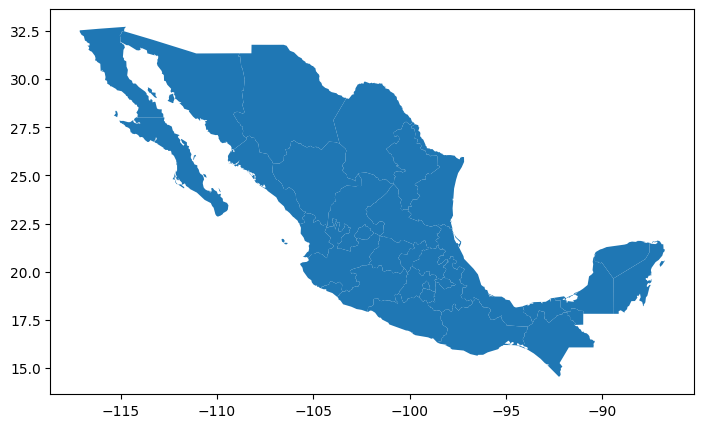

In [2]:
mexico = geopandas.read_file(libpysal.examples.get_path("mexicojoin.shp"))
mexico.plot(figsize = (10,5))
pth = libpysal.examples.get_path("mexicojoin.shp")
mexico = geopandas.read_file(pth)
mexico.head()

In this example, we take `HECTARES` as the spatial extensive attribute and set the threshold value to 20 million, which requires that each region needs to be at least 20 million hectares large. Also, we take `PCGDP1940` as the similarity attritute, which suggests that the areas partitioned into the same region are expected to have similar `PCGDP1940` value.

In [3]:
results = generalized_p.generalized_p(mexico, libpysal.weights.Queen.from_dataframe(mexico),'PCGDP1940', 'HECTARES', 20000000, 5)
if results != None:
    hetero, l = results[0], results[1]
print(hetero)
print(l)

420157.0
[2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 3, 3, 4, 3, 4, 4, 3, 3, 0]


Then, we visualize the regionalization results by assigning different colors to different regions

<Axes: >

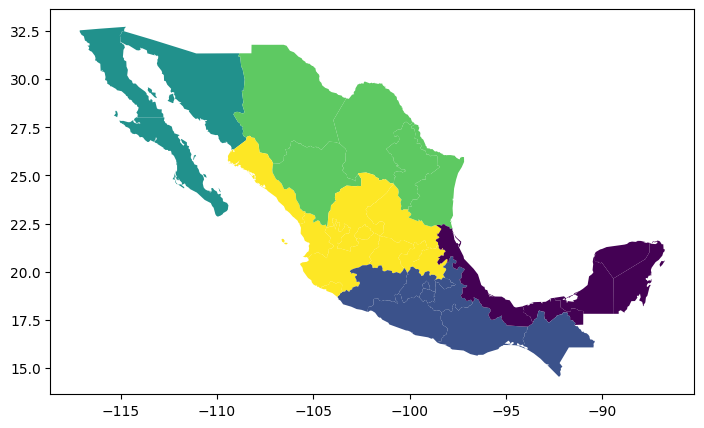

In [4]:
mexico['region'] = l
mexico.plot(figsize = (10,5) , column = 'region')